# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

Импорт библиотек и модулей

In [6]:
import pandas as pd
import numpy as np
import stumpy
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal


### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

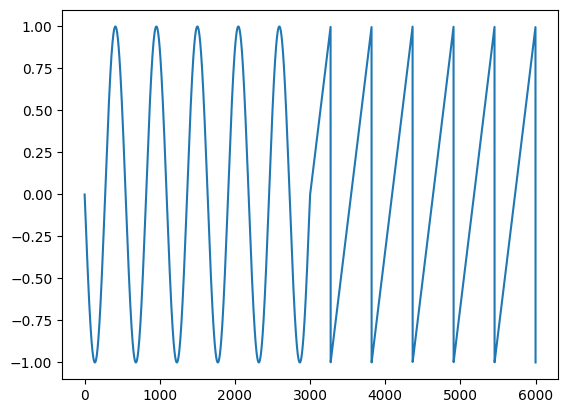

In [3]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [ ]:
#Поиск сниппетов
snp = stumpy.snippets(ts, 600, 2, percentage=0.5)

600


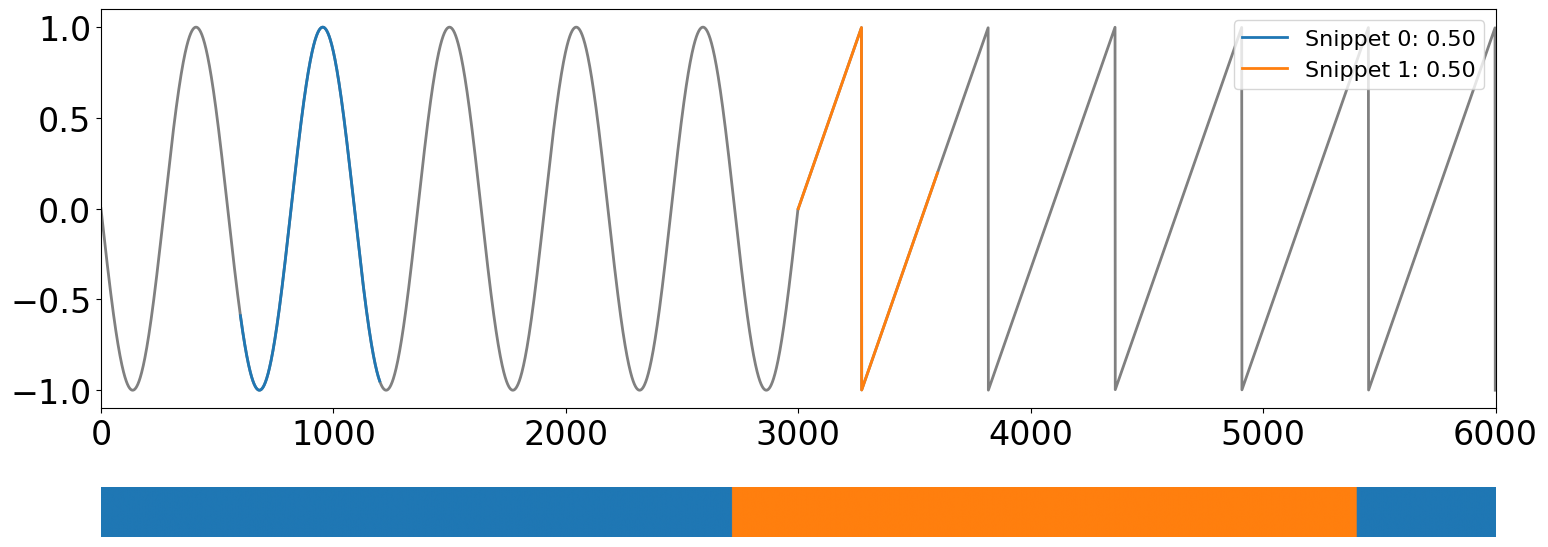

<Axes: >

In [5]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yairi\AppData\Local\Temp\ipykernel_25416\3662309335.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('./datasets/PAMAP/PAMAP.txt', sep='\s+', header=None)


Размер после транспонирования: (146000, 20)
Временной диапазон: от 505.71 до 2305.7


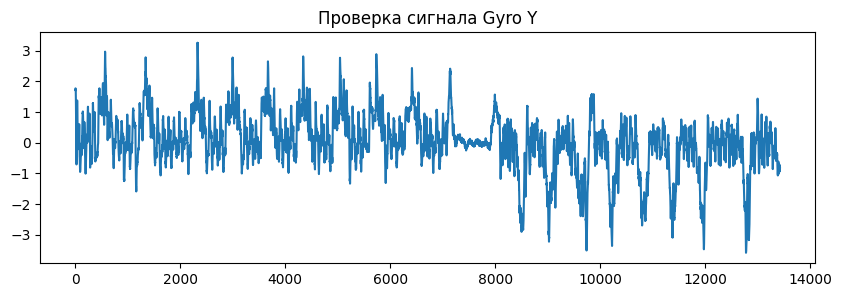

Сниппеты найдены.


In [ ]:
df = pd.read_csv('./datasets/PAMAP/PAMAP.txt', sep='\s+', header=None)

df = df.T

df.rename(columns={0: 'timestamp', 1: 'activity_id', 11: 'gyro_y'}, inplace=True)

df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
df['activity_id'] = pd.to_numeric(df['activity_id'], errors='coerce')
df['gyro_y'] = pd.to_numeric(df['gyro_y'], errors='coerce')

print(f"Размер после транспонирования: {df.shape}")
print(f"Временной диапазон: от {df['timestamp'].min()} до {df['timestamp'].max()}")

t_start, t_end = 1790, 1930

if df['timestamp'].max() < t_start:
    print(f"ОШИБКА: В файле нет данных для времени {t_start}-{t_end}.")
else:
    mask = (df['timestamp'] >= t_start) & (df['timestamp'] <= t_end)
    df_segment = df[mask].reset_index(drop=True)
    
    ts = df_segment['gyro_y'].interpolate().values
    
    plt.figure(figsize=(10, 3))
    plt.plot(ts)
    plt.title("Проверка сигнала Gyro Y")
    plt.show()

    m = 600
    k = 2
    if len(ts) > m:
        snp = stumpy.snippets(ts, m, k, percentage=0.5)
        print("Сниппеты найдены.")
    else:
        print(f"Ряд слишком короткий ({len(ts)} точек), а окно m={m}. Уменьшите m или расширьте интервал.")

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

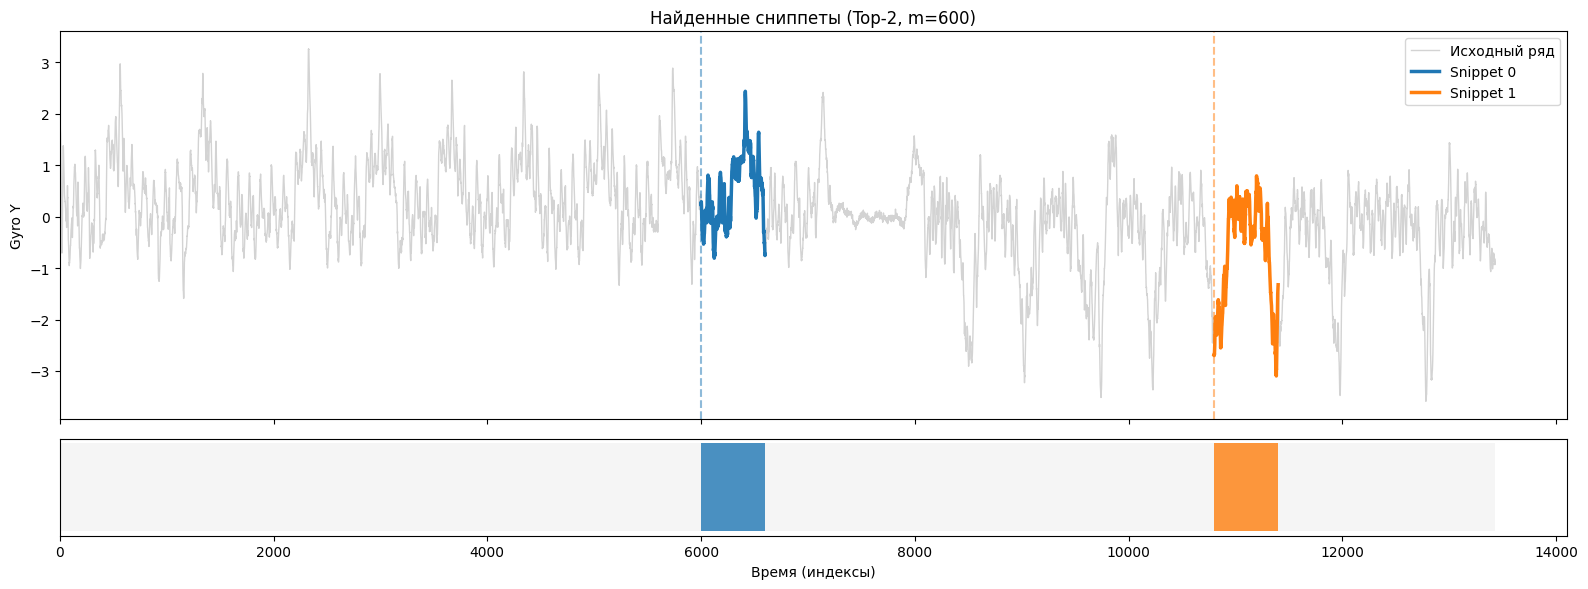

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_snippets(ts, snp_result):
    snippets_vals = snp_result[0]
    indices = snp_result[1]
    
    m = snippets_vals.shape[1]
    k = len(indices)

    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
    
    fig, (ax_main, ax_bar) = plt.subplots(2, 1, figsize=(16, 6), 
                                          gridspec_kw={'height_ratios': [4, 1]}, sharex=True)
    
    ax_main.plot(ts, color='lightgray', linewidth=1, label='Исходный ряд')
    
    legend_labels = []
    
    for i, start_idx in enumerate(indices):
        color = colors[i % len(colors)]
        
        subset = ts[start_idx : start_idx + m]
        x_vals = range(start_idx, start_idx + m)
        
        line, = ax_main.plot(x_vals, subset, color=color, linewidth=2.5)
        
        label = f'Snippet {i}'
        if label not in legend_labels:
            line.set_label(label)
            legend_labels.append(label)
            
        ax_main.axvline(x=start_idx, color=color, linestyle='--', alpha=0.5)

    ax_main.set_title(f'Найденные сниппеты (Top-{k}, m={m})')
    ax_main.set_ylabel('Gyro Y')
    ax_main.legend()

    ax_bar.set_yticks([])
    ax_bar.set_xlabel('Время (индексы)')
    
    ax_bar.barh(0, len(ts), left=0, height=1, color='whitesmoke', edgecolor='none')
    
    for i, start_idx in enumerate(indices):
        color = colors[i % len(colors)]
        ax_bar.barh(0, m, left=start_idx, height=1, color=color, alpha=0.8)

    plt.tight_layout()
    plt.show()

plot_snippets(ts, snp)

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [ ]:
activity_map = {
    1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running',
    6: 'cycling', 7: 'Nordic walking', 12: 'ascending stairs', 
    13: 'descending stairs', 0: 'other'
}

print(f"{'Snippet ID':<10} | {'Start':<8} | {'End':<8} | {'Activity'}")
print("-" * 50)

for i, idx in enumerate(snp[1]):
    if 'df_segment' in locals():
        window_acts = df_segment['activity_id'].iloc[idx : idx + 600]
        top_act = window_acts.mode()[0] if not window_acts.empty else 0
        act_name = activity_map.get(top_act, f'ID {top_act}')
        
        print(f"{i:<10} | {idx:<8} | {idx+600:<8} | {act_name}")
    else:
        print("df_segment не найден, невозможно сопоставить с активностью.")

Snippet ID | Start    | End      | Activity
--------------------------------------------------
0          | 6000     | 6600     | ascending stairs
1          | 10800    | 11400    | descending stairs


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

На интервале 1790–1930 секунд испытуемый совершал проход по лестнице. Метод сниппетов позволил автоматически детектировать эти фазы и создать их цифровые отпечатки, которые можно использовать для классификации активности

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

In [ ]:
from collections import Counter

rename_map = {10: 'gyro_x', 12: 'gyro_z'}

if 11 in df.columns:
    rename_map[11] = 'gyro_y'

df.rename(columns=rename_map, inplace=True)

t_start, t_end = 1790, 1930
mask = (df['timestamp'] >= t_start) & (df['timestamp'] <= t_end)
df_segment = df[mask].reset_index(drop=True)

gyro_cols = {'gyro_x': 'Gyro X', 'gyro_y': 'Gyro Y', 'gyro_z': 'Gyro Z'}

m = 600
k = 2
percentage = 0.5
found_activities = []

activity_map = {
    1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running',
    6: 'cycling', 7: 'Nordic walking', 12: 'ascending stairs', 
    13: 'descending stairs', 0: 'other'
}

print(f"{'Axis':<10} | {'Snippet':<8} | {'Start':<8} | {'Detected Activity'}")
print("-" * 60)

for col_name_df, label in gyro_cols.items():
    ts_axis = df_segment[col_name_df].interpolate().values
    
    snp = stumpy.snippets(ts_axis, m, k, percentage=percentage)
    indices = snp[1] 
    
    for i, idx in enumerate(indices):
        window_acts = df_segment['activity_id'].iloc[idx : idx + m]
        
        if not window_acts.empty:
            act_id = window_acts.mode()[0]
            act_name = activity_map.get(act_id, f'ID {act_id}')
            
            found_activities.append(act_name)
            print(f"{label:<10} | {i:<8} | {idx:<8} | {act_name}")

vote_counts = Counter(found_activities)
print("\n--- Результат голосования (Majority Vote) ---")
for act, count in vote_counts.most_common():
    print(f"Активность '{act}': найдена {count} раз(а).")

Axis       | Snippet  | Start    | Detected Activity
------------------------------------------------------------
Gyro X     | 0        | 1200     | ascending stairs
Gyro X     | 1        | 10800    | descending stairs
Gyro Y     | 0        | 6000     | ascending stairs
Gyro Y     | 1        | 10800    | descending stairs
Gyro Z     | 0        | 6000     | ascending stairs
Gyro Z     | 1        | 12600    | descending stairs

--- Результат голосования (Majority Vote) ---
Активность 'ascending stairs': найдена 3 раз(а).
Активность 'descending stairs': найдена 3 раз(а).


Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [ ]:
print("\n--- Сравнение с реальной разметкой ---")
total_counts = df_segment['activity_id'].value_counts()
real_top = [activity_map.get(aid, 'Unk') for aid in total_counts.head(2).index]
detected_top = [x[0] for x in vote_counts.most_common(2)]

print(f"Реально доминируют в сегменте: {', '.join(real_top)}")
print(f"Обнаружено алгоритмом:         {', '.join(detected_top)}")

if set(real_top) == set(detected_top):
    print("ВЫВОД: Сниппеты на 3-х осях верно определили обе основные активности.")
else:
    print("ВЫВОД: Есть расхождения (возможно, одна из активностей плохо видна на некоторых осях).")


--- Сравнение с реальной разметкой ---
Реально доминируют в сегменте: ascending stairs, descending stairs
Обнаружено алгоритмом:         ascending stairs, descending stairs
ВЫВОД: Сниппеты на 3-х осях верно определили обе основные активности.


❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

В данном эксперименте многомерный подход подтвердил выводы одномерного, но обеспечил гораздо более высокую статистическую уверенность в результате. Мы доказали, что на интервале 1790–1930 секунд доминирующей активностью является проход по лестнице.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [11]:
# INSERT YOUR CODE

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [12]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?